# 何ら根拠のないルールに則って整数を並べた時、素数はどのような形に並ぶのだろうか？

## No.1  二次元平面にプロットしてみる

テキトーな組み合わせの材料には、**三角関数**、**円周率$\pi$**、**ネイピア数$e$**、さらに唯一**偶数の素数 $２$**を使います。  


### まずは素数のリストを作る。  

この先、素数のリストの作成には、以下の関数を使用します。  
正直、この関数で本当にちゃんと素数が生成されているか確証はないですが...多分大丈夫でしょ？  

**実際にこのページの内容を`jupyter notebook`で試す場合、この素数生成用関数と色分け用関数のセルを先に実行しておいて下さい**

In [1]:
import numpy as np

def choice_prime_num(arr):
    """Extract prime numbers"""
    if isinstance(arr, np.ndarray):
        arr = arr.tolist()
    if 0 in arr:
        arr.remove(0)
    if 1 in arr:
        arr.remove(1)
    prime = []
    _min = min(arr)
    _max = max(arr)
    while _min <= np.sqrt(_max):
        _min = min(arr)
        prime.append(_min)
        for i in arr:
            if i != _min and i % _min == 0:
                arr.remove(i)
        arr.remove(_min)
    prime.extend(arr)

    return prime

prime =choice_prime_num(np.arange(0, 100))
print(prime)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


### 色分け用関数   

整数全体をプロットする時に、色分けをする関数  

- 素数 : <span style="color:lime;"><strong>lime</strong></span>, 
- 奇数 : <span style="color:slategray;"><strong>slategray</strong></span>, 
- 偶数 : <span style="color:darkslateblue;"><strong>darkslateblue</strong></span>)  


In [2]:
def divied_colors(int_range, prime_num):
    """Color code by value"""
    colors = []
    for num in range(len(int_range)):
        if num in prime_num:
            colors.append('lime')
        elif num % 2 == 0:
            colors.append('darkslateblue')
        else:
            colors.append('slategray')
    return colors


## 渦巻状に数値を配置してみる  

この先は、オリジナルの「ウラムの螺旋」っぽく、数値を螺旋状に配置していく事を原則として話を進めていきます。  
生成過程を確認したい時は、このリポジトリにある`plot_process.py`で確認してみて下さい（実行には`pygame`モジュールが必要)  

ここでの条件は以下。

- $n$は０以上、5,000以下の正の整数 
- 半径は $r = n$   
- 角速度$(rad)$はテキトーに考えた&emsp;$rad = \frac{e \pi}{2}$ 。後でこの$rad$値を色々替えて変化を見る。
- 回転角$\theta$は$rad \times n$



座標上の点 $(x, y)$は  
- $x = r \cos{(\theta)}$
- $y = r \sin{(\theta)}$

として描画してみます。

改めて言っておきますが、式は**思い付きで**組み合わせただけのものです。


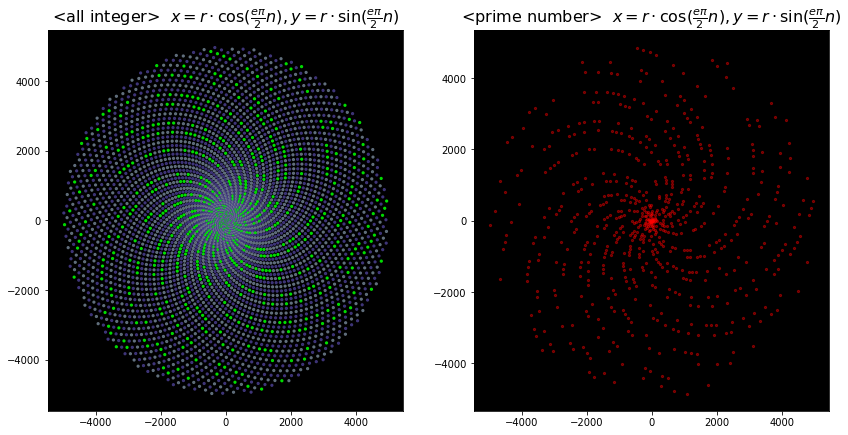

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Maximum number of integers to handle
INT_RANGE = np.arange(0, 5001)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))


# Try switching "rad".

rad = {'rad': (np.e / 2) * np.pi, 'text': r'\frac{e \pi}{2}'}
# rad = {'rad': (2 * np.pi**np.e) / (np.e**(-2 * np.pi)), 'text': r'\frac{2 \pi^{e}}{e^{-2 \pi}}'}
# rad = {'rad': (np.pi**np.e) / (np.e**(-np.pi)), 'text': r'\frac{\pi^{e}}{e^{- \pi}}'}
# rad = {'rad': (2 * np.pi) / np.e**2, 'text': r'\frac{2 \pi}{e^{2}}'}
# rad = {'rad': np.e / (2 * np.pi), 'text': r'\frac{e}{2 \pi}'}
# rad = {'rad': np.e**(np.pi) / (np.pi**np.e), 'text': r'\frac{e^{\pi}}{\pi^{e}}'}
# rad = {'rad': np.e**(2 * np.pi) / (2 * np.pi**np.e), 'text': r'\frac{e^{2 \pi}}{2 \pi^{e}}'}
# rad = {'rad': 2 / (np.e*np.pi), 'text': r'\frac{2}{e \pi}'}
# rad = {'rad': np.pi**np.e, 'text': r'\pi^{e}'}
# rad = {'rad': 2**np.e*np.pi, 'text': r'2^{e \pi}'}
# rad = {'rad': (2*np.e)**np.pi, 'text': r'2 e^{\pi}'}


def plot_2d(int_range, prime_num, rad):
    radius = lambda n: n*np.e
    theta = rad['rad'] * int_range
    theta_prime = rad['rad'] * prime_num
    colors = divied_colors(int_range, prime_num)

    # ax1: All integer, ax2: prime number only
    ax1_x = int_range * np.cos(theta)
    ax1_y = int_range * np.sin(theta)
    ax2_x = prime_num * np.cos(theta_prime)
    ax2_y = prime_num * np.sin(theta_prime)

    plt.figure(figsize=(14, 7))

    ax1 = plt.subplot(121)
    ax1.set_title(r'<all integer>  $x=r \cdot \cos({} n), y=r \cdot \sin({} n)$'.format(rad['text'], rad['text']), fontsize=16)
    ax1.set_facecolor('black')
    ax1.scatter(ax1_x, ax1_y, s=5, c=colors, alpha=0.8)

    ax2 = plt.subplot(122)
    ax2.set_title(r'<prime number>  $x=r \cdot \cos({} n), y=r \cdot \sin({} n)$'.format(rad['text'], rad['text']), fontsize=16)
    ax2.set_facecolor('black')
    ax2.scatter(ax2_x, ax2_y, s=5, c='red', alpha=0.4)

    plt.show()

plot_2d(INT_RANGE, PRIME_NUM, rad)

(素数 : <span style="color:lime;"><strong>lime</strong></span>, 
奇数 : <span style="color:slategray;"><strong>slategray</strong></span>, 
偶数 : <span style="color:darkslateblue;"><strong>darkslateblue</strong></span>)  

どうなんでしょう？？  
何となく、法則性があるような、無いような...

`int_range`の値や`rad`のパターンを変更してみると（コメントアウトを外して切り替えてみて下さい）違った法則があるように見えたり、単にスケールの違いだけの問題のように見えたり…  

**まぁ、率直に言ってよく分かりません（苦笑）**  


`rad`を切り替えて、別のパターンを描画してみます。 （ $\theta = \frac{2 \pi^{e}}{e^{-2 \pi}} n$）



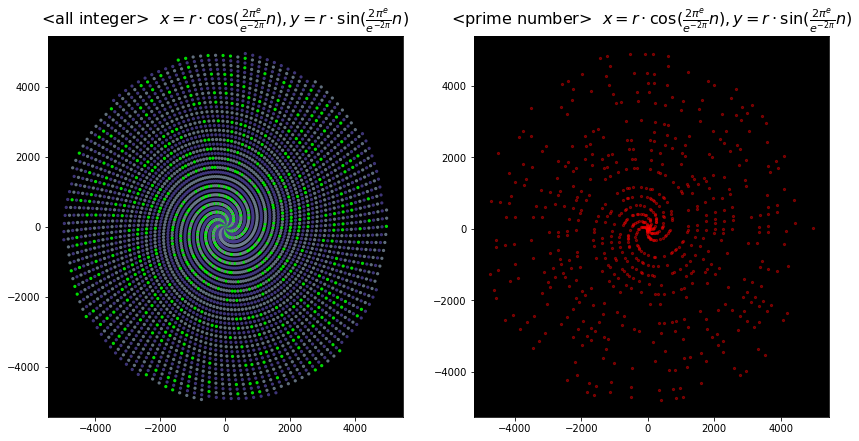

In [4]:
INT_RANGE = np.arange(0, 5001)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))
rad_0 = {'rad': (2 * np.pi**np.e) / (np.e**(-2 * np.pi)), 'text': r'\frac{2 \pi^{e}}{e^{-2 \pi}}'}

plot_2d(INT_RANGE, PRIME_NUM, rad_0)

当然ですが、偶数が並ぶ所には素数が現れませんので、渦がきれいに出来ています。  
よ〜く観察してみると素数が現れない奇数の渦もあります。  
見ようによっては、中央から放射状に「素数の筋」が出来ているようにも見えます。

最大値を40,000まで増やしてみます（処理に少々時間がかかります）  

まず、$\theta = \frac{e \pi }{2}n$

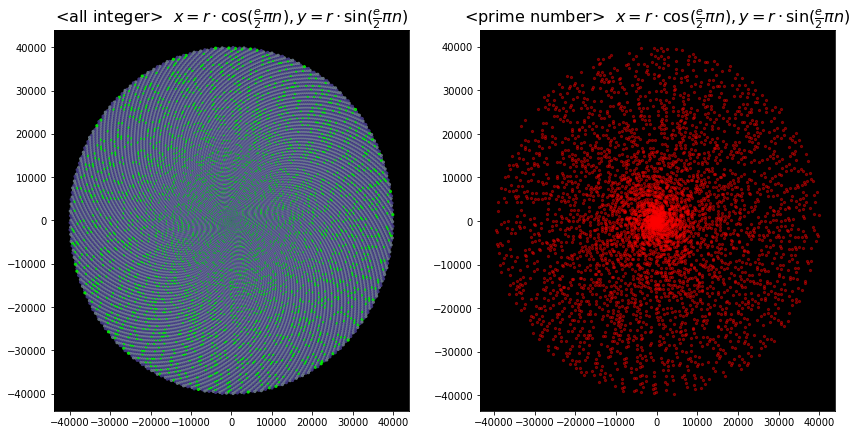

In [5]:
INT_RANGE = np.arange(0, 40000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))
rad = {'rad': (np.e / 2) * np.pi, 'text': r'\frac{e}{2} \pi'}

plot_2d(INT_RANGE, PRIME_NUM, rad)

次に$\theta = \frac{2 \pi^{e}}{e^{-2 \pi}} n$

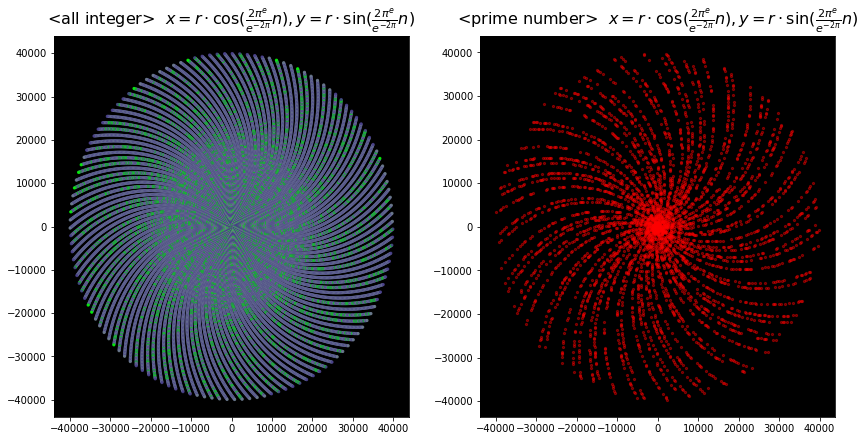

In [6]:
INT_RANGE = np.arange(0, 40000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))
rad = {'rad': (2 * np.pi**np.e) / (np.e**(-2 * np.pi)), 'text': r'\frac{2 \pi^{e}}{e^{-2 \pi}}'}

plot_2d(INT_RANGE, PRIME_NUM, rad)

規模が変わると模様（の見え方）も変わってくるようです。  

他のパターンも最大値を増やして試してみると、何か面白い発見があるかも知れません。  

### "rad"の値を色々替えた時のパターン  

最大値5,000のパターンのみ実行してあります。

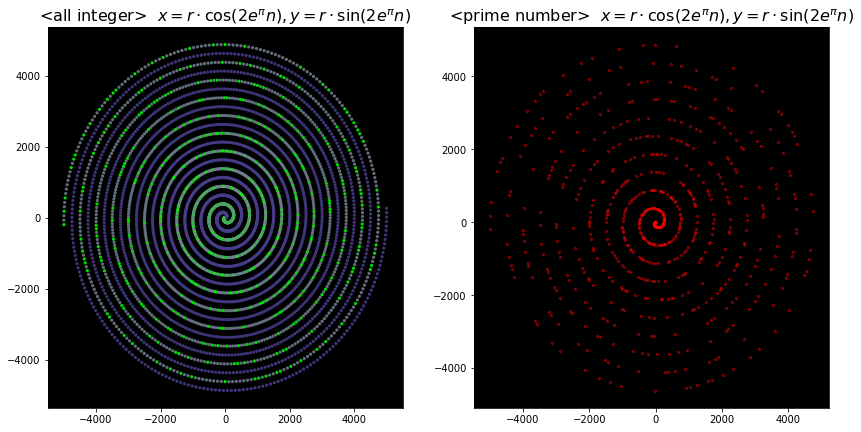

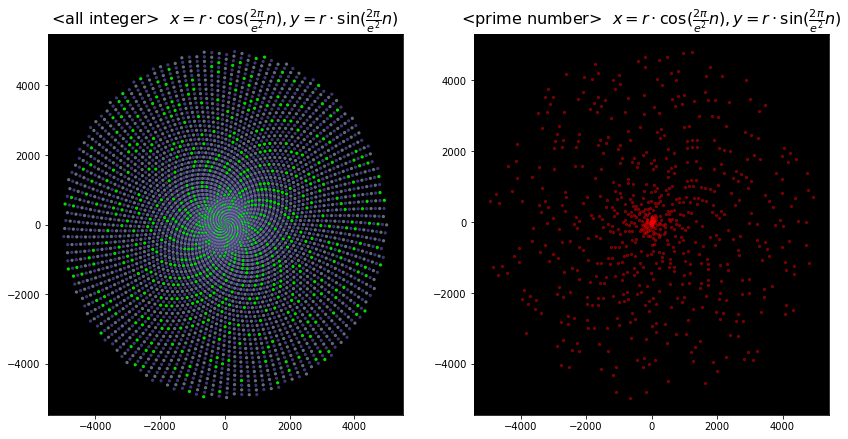

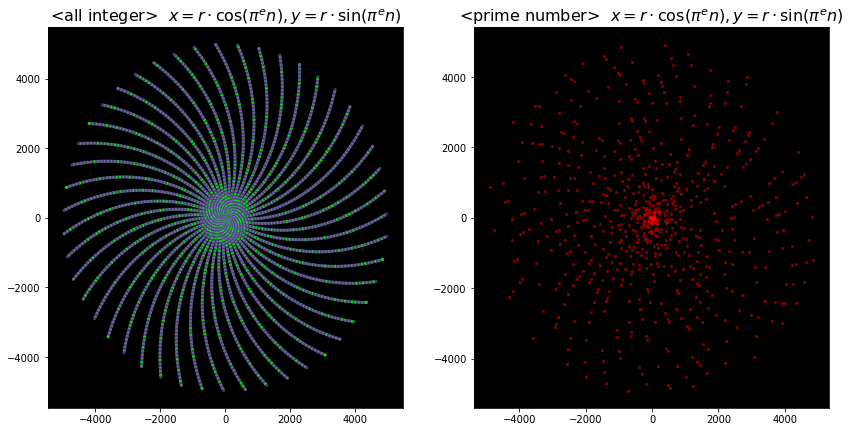

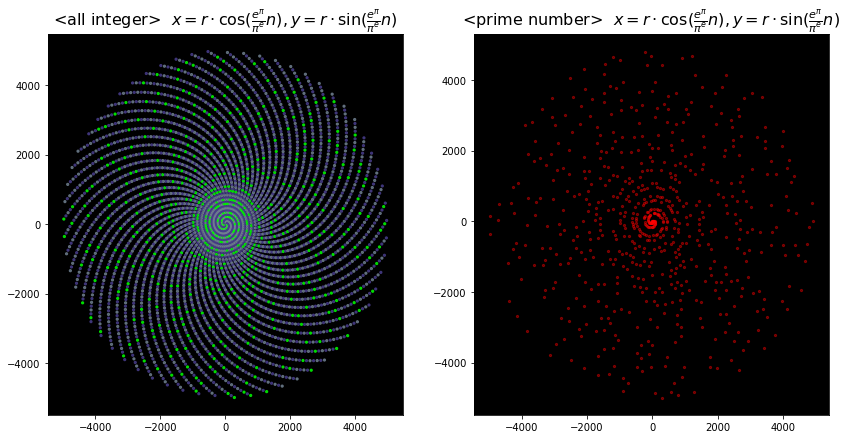

In [7]:
INT_RANGE = np.arange(0, 5001)
PRIME_NUM_5000 = np.array(choice_prime_num(INT_RANGE))
rad_1 = {'rad': (2*np.e)**np.pi, 'text': r'2 e^{\pi}'}
rad_2 = {'rad': (2 * np.pi) / np.e**2, 'text': r'\frac{2 \pi}{e^{2}}'}
rad_3 = {'rad': np.pi**np.e, 'text': r'\pi^{e}'}
rad_4 = {'rad': np.e**(np.pi) / (np.pi**np.e), 'text': r'\frac{e^{\pi}}{\pi^{e}}'}
                     
plot_2d(INT_RANGE, PRIME_NUM_5000, rad_1)
plot_2d(INT_RANGE, PRIME_NUM_5000, rad_2)
plot_2d(INT_RANGE, PRIME_NUM_5000, rad_3)
plot_2d(INT_RANGE, PRIME_NUM_5000, rad_4)


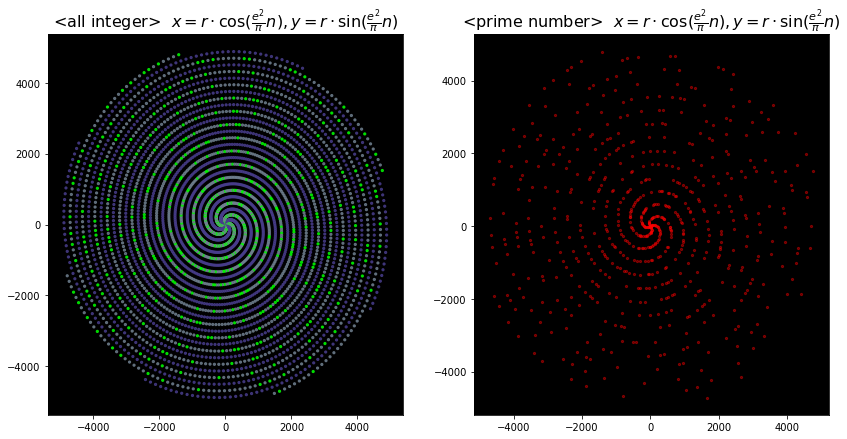

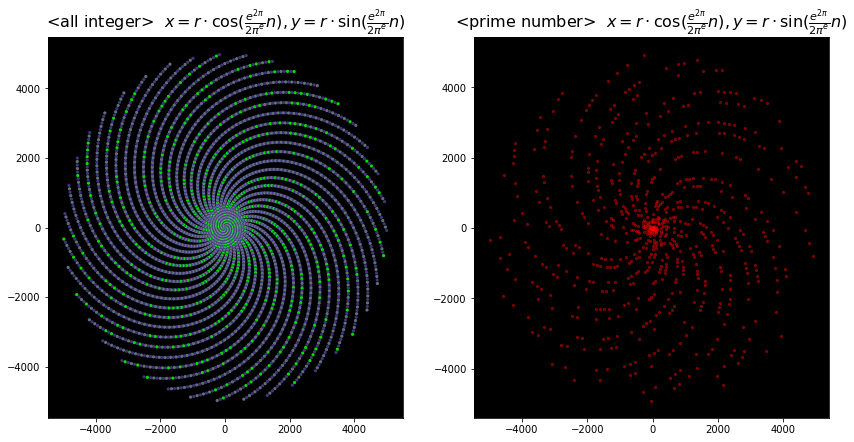

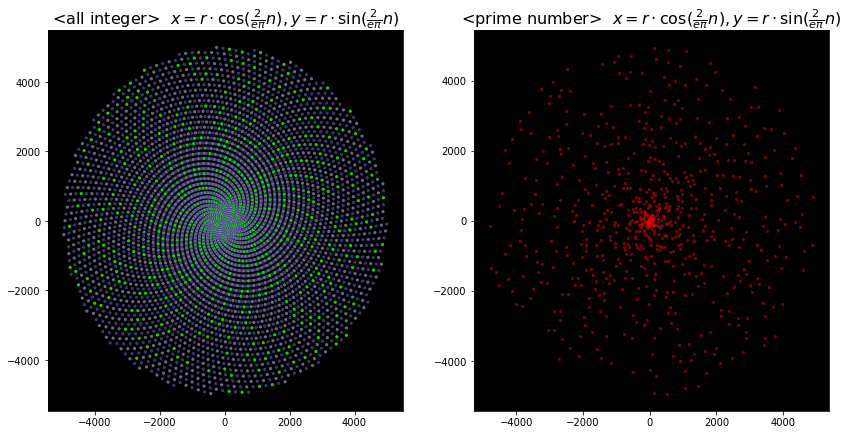

In [8]:
rad_5 = {'rad': np.e**2/ np.pi, 'text': r'\frac{e^{2}}{\pi}'}
rad_6 = {'rad': np.e**(2 * np.pi) / (2 * np.pi**np.e), 'text': r'\frac{e^{2 \pi}}{2 \pi^{e}}'}
rad_7 = {'rad': 2 / (np.e*np.pi), 'text': r'\frac{2}{e \pi}'}

plot_2d(INT_RANGE, PRIME_NUM_5000, rad_5)
plot_2d(INT_RANGE, PRIME_NUM_5000, rad_6)
plot_2d(INT_RANGE, PRIME_NUM_5000, rad_7)

組み合わせ方によっては以下のようにもなります

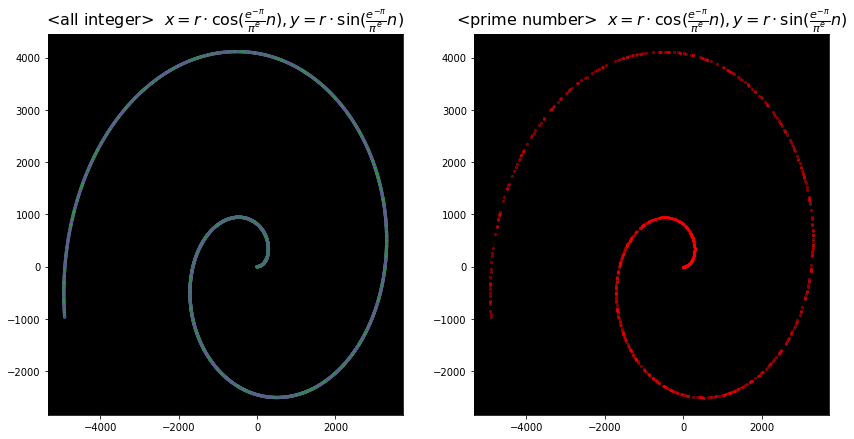

In [9]:
rad_8 = {'rad': np.e**(-np.pi) / np.pi**np.e, 'text': r'\frac{e^{- \pi}}{\pi^{e}}'}

plot_2d(INT_RANGE, PRIME_NUM_5000, rad_8)

興味があれば$rad$の値や`INT_RANGE`を変化させて、色々試してみて下さい。  

以降のファイルでは３次元空間にプロットしていきます